In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('matches.csv')
df1 = pd.read_csv('deliveries.csv')

In [6]:
df


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [13]:
#Count the total number of matches conducted in the year 2008
df['season'] = df['season'].astype(str)
matches_2008 = df[df['season'].str.contains('2008')]
total_matches = matches_2008.shape[0]
print(f'Total number of matches conducted in 2008: {total_matches}')

Total number of matches conducted in 2008: 58


In [16]:
# Find the city name where maximum and minimum number of matches conducted.
matches = df['city'].value_counts()
max_matches= matches.idxmax()
min_matches = matches.idxmin()
print(f'City with maximum number of matches: {max_matches} ({matches[max_matches]} matches)')
print(f'City with minimum number of matches: {min_matches} ({matches[min_matches]} matches)')

City with maximum number of matches: Mumbai (101 matches)
City with minimum number of matches: Bloemfontein (2 matches)


In [17]:
#Find total count of matches city wise. 
city_wise_count = df.groupby('city').size().reset_index(name='match')
print(city_wise_count)

              city  match
0        Abu Dhabi      7
1        Ahmedabad     12
2        Bangalore     66
3        Bengaluru     14
4     Bloemfontein      2
5        Cape Town      7
6        Centurion     12
7       Chandigarh     46
8          Chennai     57
9          Cuttack      7
10           Delhi     74
11      Dharamsala      9
12          Durban     15
13     East London      3
14       Hyderabad     64
15          Indore      9
16          Jaipur     47
17    Johannesburg      8
18          Kanpur      4
19       Kimberley      3
20           Kochi      5
21         Kolkata     77
22          Mohali     10
23          Mumbai    101
24          Nagpur      3
25  Port Elizabeth      7
26            Pune     38
27          Raipur      6
28          Rajkot     10
29          Ranchi      7
30         Sharjah      6
31   Visakhapatnam     13


In [22]:
#Find the Team which is maximum and minimum toss winner.
toss_wins = df.groupby('toss_winner').size().reset_index(name='toss_wins')
max_toss_winner = toss_wins.loc[toss_wins['toss_wins'].idxmax()]
min_toss_winner = toss_wins.loc[toss_wins['toss_wins'].idxmin()]
print(f"Team with maximum toss wins: {max_toss_winner['toss_winner']} with {max_toss_winner['toss_wins']} wins")
print(f"Team with minimum toss wins: {min_toss_winner['toss_winner']} with {min_toss_winner['toss_wins']} wins")

Team with maximum toss wins: Mumbai Indians with 98 wins
Team with minimum toss wins: Rising Pune Supergiant with 6 wins


In [23]:
toss_decisions = df.groupby(['toss_winner', 'toss_decision']).size().reset_index(name='count')
print(toss_decisions)

                    toss_winner toss_decision  count
0           Chennai Super Kings           bat     48
1           Chennai Super Kings         field     41
2               Deccan Chargers           bat     24
3               Deccan Chargers         field     19
4                Delhi Capitals           bat      2
5                Delhi Capitals         field      8
6              Delhi Daredevils           bat     29
7              Delhi Daredevils         field     51
8                 Gujarat Lions           bat      1
9                 Gujarat Lions         field     14
10              Kings XI Punjab           bat     26
11              Kings XI Punjab         field     55
12         Kochi Tuskers Kerala           bat      3
13         Kochi Tuskers Kerala         field      5
14        Kolkata Knight Riders           bat     30
15        Kolkata Knight Riders         field     62
16               Mumbai Indians           bat     44
17               Mumbai Indians         field 

In [24]:
#Count the total number of normal and tie matches. 
match_counts = df.groupby('result').size().reset_index(name='count')
print(match_counts)

      result  count
0  no result      4
1     normal    743
2        tie      9


In [25]:
#Find the team names where the match result is tie.
tie_matches = df.query('result == "tie"')
teams_in_tie_matches = tie_matches[['team1', 'team2']]
print(teams_in_tie_matches)

                           team1                        team2
33                 Gujarat Lions               Mumbai Indians
125             Rajasthan Royals        Kolkata Knight Riders
189              Kings XI Punjab          Chennai Super Kings
387  Royal Challengers Bangalore          Sunrisers Hyderabad
400             Delhi Daredevils  Royal Challengers Bangalore
475             Rajasthan Royals        Kolkata Knight Riders
535             Rajasthan Royals              Kings XI Punjab
705        Kolkata Knight Riders               Delhi Capitals
746               Mumbai Indians          Sunrisers Hyderabad


In [26]:
# Find the team name who won the match by highest runs.
highest_run_margin_match = df.loc[df['win_by_runs'].idxmax()]
team_with_highest_run_margin = highest_run_margin_match['winner']

print(f"Team that won by the highest runs: {team_with_highest_run_margin}")

Team that won by the highest runs: Mumbai Indians


In [28]:
# Find the team name who won the match by lowest runs.
lowest_run_margin_match = df.loc[df['win_by_runs'].idxmin()]
team_with_lowest_run_margin = lowest_run_margin_match['winner']

print(f"Team that won by the lowest runs: {team_with_lowest_run_margin}")

Team that won by the lowest runs: Rising Pune Supergiant


In [33]:
# Find the players who was awarded “Player of the match” more than 3 times.
player_awards = df.groupby('player_of_match').size().reset_index(name='awards')
morethan3awards = player_awards[player_awards['awards'] > 3]
print(morethan3awards)

    player_of_match  awards
3          A Mishra      11
4           A Nehra       6
10   AB de Villiers      20
11     AC Gilchrist       7
15       AD Russell      11
..              ...     ...
214        UT Yadav       8
216         V Kohli      12
217        V Sehwag      11
222       YK Pathan      16
224    Yuvraj Singh       5

[65 rows x 2 columns]


In [35]:
# Find the player who was awarded as player of the match maximum times. \
player_of_the_match_counts = df['player_of_match'].value_counts()
mostawardedplayer = player_of_the_match_counts.idxmax()
max_awards = player_of_the_match_counts.max()

print(f" {mostawardedplayer} with {max_awards} awards.")

 CH Gayle with 21 awards.


In [40]:
highest_run_margin_match = df.loc[df['win_by_runs'].idxmax()]
venue=highest_run_margin_match['venue']
print(f"venue: {venue}")

venue: Feroz Shah Kotla


In [41]:
lowest_run_margin_match = df.loc[df['win_by_runs'].idxmin()]
venue=lowest_run_margin_match['venue']
print(f"venue: {venue}")

venue: Maharashtra Cricket Association Stadium


In [43]:
all_umpires = pd.concat([df['umpire1'], df['umpire2']])
umpire_counts = all_umpires.value_counts()

active_umpire = umpire_counts.idxmax()
max_matches = umpire_counts.max()

print(f"{active_umpire} with {max_matches} matches.")

S Ravi with 106 matches.


In [45]:
15) Find the Total matches played in each season

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
dtype: int64


In [49]:
# No. of tosses won by each team 
toss_wins = df['toss_winner'].value_counts()
#print(toss_wins)

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64


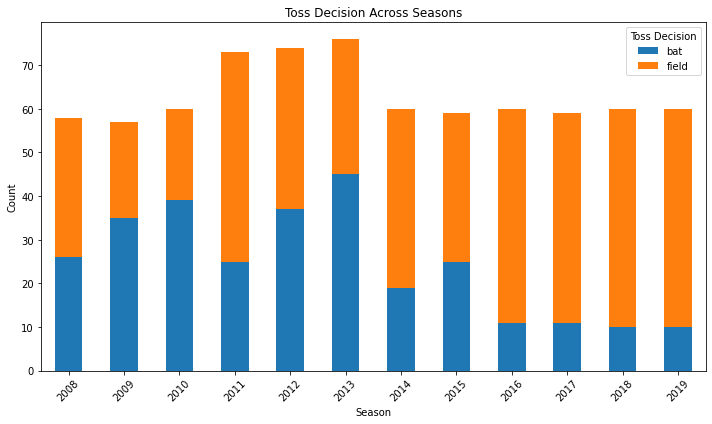

In [51]:
#Visualize the Toss decision across season
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', hue='toss_decision', data=toss_decision_counts)
plt.title('Toss Decision Across Seasons in IPL')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Toss Decision', loc='upper right')
plt.show()

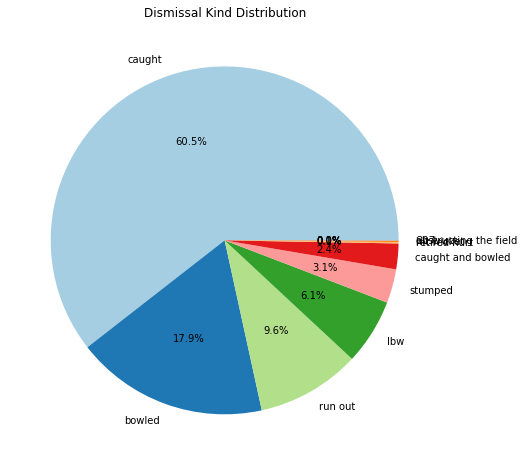

In [55]:
# Find the Dismissal Kind and Visualize using best fit graph
dismissal_summary = df1['dismissal_kind'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(dismissal_summary, labels=dismissal_summary.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(dismissal_summary))))
plt.title('Dismissal Kind Distribution')
plt.show()

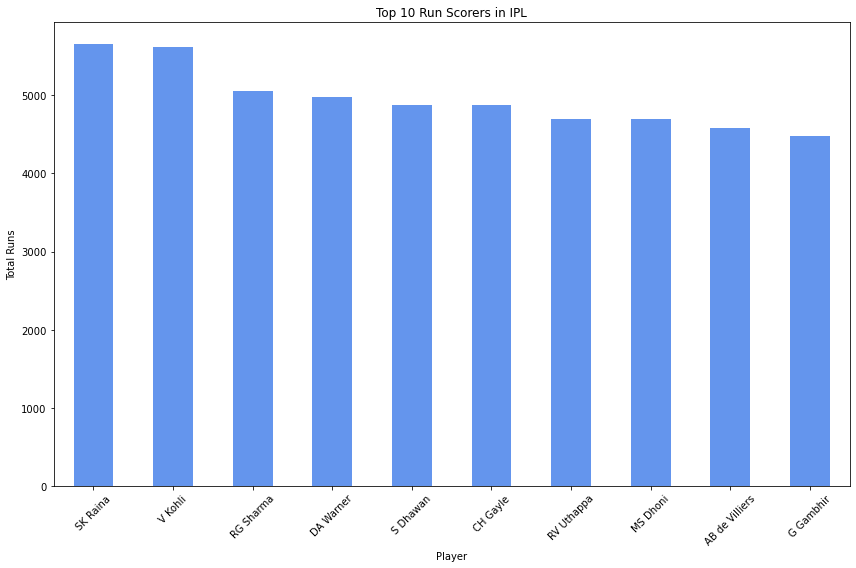

In [59]:
# Find the Top 10 run scorers in IPL and Visualize using best fit graph 
player_runs = df1.groupby('batsman')['total_runs'].sum()
top_10_scorers = player_runs.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_10_scorers.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [60]:
#Visualize the Highest MOM award winners
player_of_the_match_counts = df['player_of_match'].value_counts()
mostawardedplayer = player_of_the_match_counts.idxmax()
max_awards = player_of_the_match_counts.max()

print(f" {mostawardedplayer} with {max_awards} awards.")

 CH Gayle with 21 awards.


In [63]:
# Find Total Number of Played Matches by each team 
team1_counts = df['team1'].value_counts()
team2_counts = df['team2'].value_counts()
total_matches = team1_counts.add(team2_counts, fill_value=0).astype(int)
total_matches = total_matches.sort_values(ascending=False)
print(total_matches)

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int32


In [66]:
# Compare Total Played Matches vs Winning Matches vs Win Rate 
team1_counts = df['team1'].value_counts()
team2_counts = df['team2'].value_counts()
total_matches = team1_counts.add(team2_counts, fill_value=0).astype(int)
wins = df['winner'].value_counts()
stats_df = pd.DataFrame({
    'Total Matches': total_matches,
    'Wins': wins
})
stats_df['Win Rate'] = (stats_df['Wins'] / stats_df['Total Matches']) * 100
stats_df.fillna(0, inplace=True)
stats_df = stats_df.sort_values(by='Total Matches', ascending=False)
print(stats_df)

                             Total Matches  Wins   Win Rate
Mumbai Indians                         187   109  58.288770
Royal Challengers Bangalore            180    84  46.666667
Kolkata Knight Riders                  178    92  51.685393
Kings XI Punjab                        176    82  46.590909
Chennai Super Kings                    164   100  60.975610
Delhi Daredevils                       161    67  41.614907
Rajasthan Royals                       147    75  51.020408
Sunrisers Hyderabad                    108    58  53.703704
Deccan Chargers                         75    29  38.666667
Pune Warriors                           46    12  26.086957
Gujarat Lions                           30    13  43.333333
Delhi Capitals                          16    10  62.500000
Rising Pune Supergiant                  16    10  62.500000
Kochi Tuskers Kerala                    14     6  42.857143
Rising Pune Supergiants                 14     5  35.714286


In [68]:
#Find the Distribution of Won the Matches 
wins = df['winner'].value_counts()

wins_df = wins.reset_index()
 = ['Team', 'Matches Won']
print(wins_df.columns)

Index(['Team', 'Matches Won'], dtype='object')


In [ ]:
team1_counts = df['Team1'].value_counts()

# Count matches where each team is listed as Team2
team2_counts = df['Team2'].value_counts()

# Combine counts from both columns
total_matches = team1_counts.add(team2_counts, fill_value=0).astype(int)
